<a href="https://colab.research.google.com/github/MatheusOrange211/Bootcamp-Alura/blob/main/PROJETO_MODULO_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PERGUNTA :
COMO ESTÁ A SAÚDE PSICOLÓGICA DOS ALUNOS?

> A adolescência é um período muito importante na vida das pessoas. Neste período, enfrentamos os primeiros desafios da vida adulta, ainda que em grau menor. Passamos por altos e baixos na autoestima e nas relações ao nosso redor. O projeto abaixo tem como objetivo, de forma simples, apenas tentar entender melhor o comportamento dos alunos que foram entrevistados e buscar entender melhor a forma como agem com amigos e familiares e como estes encontram-se em suas vidas. Buscar entender, ainda que superficialmente como são as relações ao seu redor em cada idade.



#IMPORTANDO BIBLIOTECAS E CONFIGURAÇÕES INICIAIS

In [1]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
sns.set()

#IMPORTANDO OS DADOS

In [3]:
arquivos = "/content/drive/MyDrive/bootcamp-modulo3/PeNSE_2015_AMOSTRA2.zip"
zip = ZipFile(arquivos)
amostra_alunoescola = zip.namelist()[1]

In [4]:
dados = pd.read_csv(zip.open(amostra_alunoescola),sep=';',thousands='.',decimal=',')
dados

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB11005,VB11006,VB11007,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,2,7,3,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,5,1,8,3,4,3,6,6,1,6,1,-1,2,...,2,1,2,1,1,4,2,-1,3,1,1,-1,1,1,2,2,1,2,2,2,2,2,2,2,371.0,1570.0,37.1,157.0,2,1,1223,1,299.735235,1,2,4,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,1,7,3,2,-1,1,1,1,1,1,2,2,2,4,1,2,2,5,3,8,2,1,8,8,6,1,1,5,-1,2,...,2,3,2,4,4,4,1,2,3,3,1,-1,1,1,2,2,2,2,2,1,2,2,2,2,502.0,1520.0,50.2,152.0,2,2,1223,1,355.170081,1,2,4,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,1,5,5,2,-1,2,1,1,1,1,2,3,1,4,1,2,2,5,3,2,3,1,8,2,8,1,1,5,5,1,...,2,1,2,1,2,3,1,2,1,2,5,99,1,-1,2,2,1,1,1,1,1,1,1,1,482.0,1614.0,48.2,161.4,2,2,1223,1,299.735235,1,2,4,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,1,7,4,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,6,3,2,4,1,3,2,7,1,5,1,-1,2,...,2,1,2,2,2,4,1,10,3,1,2,-1,1,-1,2,2,1,2,2,2,1,2,2,2,694.0,1725.0,69.4,172.5,2,3,1223,1,355.170081,1,2,4,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,2,5,4,2,-1,2,1,1,1,1,2,5,1,4,1,2,2,6,5,6,3,5,2,6,2,1,5,1,5,1,...,2,1,4,2,2,4,1,3,2,2,2,13,1,-1,1,2,1,1,1,1,1,1,1,1,789.0,1675.0,78.9,167.5,2,4,1223,1,299.735235,1,2,4,1,5,1,296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16551,2015,76,5,1,2,4,12,8,8,1,1,7,5,2,-1,1,1,1,1,1,1,3,1,3,1,2,2,6,3,8,7,5,8,7,5,1,2,1,-1,2,...,2,1,1,1,1,4,1,2,1,1,1,7,1,1,2,2,2,2,2,2,1,2,2,2,567.0,1679.0,56.7,167.9,2,2,521,5,447.815539,1,2,4,1,16552,371,117
16552,2015,76,5,1,1,1,15,7,5,1,1,7,4,2,-1,2,1,1,1,1,1,3,1,3,1,1,2,5,4,6,2,4,1,6,1,1,6,4,-1,2,...,2,1,2,1,1,4,1,2,1,2,5,12,1,-1,2,2,1,2,2,2,2,2,2,2,619.0,1858.0,61.9,185.8,2,2,521,5,592.507440,1,2,4,1,16553,371,117
16553,2015,76,5,1,1,4,13,11,7,1,1,7,4,2,-1,1,2,1,1,1,2,3,1,3,1,2,2,5,4,8,1,8,2,8,1,1,5,5,-1,2,...,2,4,1,5,5,4,1,7,3,1,5,-1,1,-1,2,2,2,2,2,2,1,2,2,2,609.0,1594.0,60.9,159.4,2,3,521,5,401.131512,1,2,4,1,16554,371,117
16554,2015,76,5,1,1,4,14,8,6,1,1,7,4,2,-1,1,1,1,1,1,1,3,2,3,1,1,2,5,3,7,5,6,4,8,7,3,1,5,-1,2,...,2,3,2,3,4,4,2,-1,1,1,2,7,1,-1,1,1,2,2,2,2,1,2,2,2,473.0,1578.0,47.3,157.8,2,2,521,5,442.718091,1,2,4,1,16555,371,117


#FUNÇÕES USADAS

Cria uma tabela com coluna de frequencia e porcentagem, podendo também aceitar um dicionário de dados para substituir campos com códigos da pergunta, além de um título.

In [5]:
def formated_table(dataset : pd.DataFrame, dicionario : dict  = None, title_index :str = None):
  frequency = dataset.value_counts()
  percentage = (dataset.value_counts(normalize=True) * 100).round(2)
  final_dataset = pd.DataFrame({"Frequencia":frequency,"Porcentagem":percentage})

  if dicionario:
    final_dataset.rename(index = dicionario, inplace = True)
  
  if title_index:
    final_dataset.rename_axis(title_index,axis=1,inplace=True)
  
  return final_dataset

Função que realiza os crosstabs e já substitui os campos requeridos pelos respecitos dicionários 

In [108]:
def crosstab_data(dataset1: pd.DataFrame, dataset2:pd.DataFrame,normal:str = "index",dicio1:dict= None, dicio2: dict = None):
    dataframe = (pd.crosstab(dataset1,dataset2,normalize=f"{normal}")*100).round(2)
    
    if dicio1:
      dataframe.rename(index=dicio1,inplace=True)

    if dicio2:
      dataframe = dataframe.rename(columns=dicio2)
    
    return dataframe

#ANALISES

**Percentual de alunos do sexo Masculino e Feminino**

Primeiramente, precisamos deixar bem claro o que temos nos nossos dados. A informações abaixo nos mostram a distribuição dos nossos alunos em relação a sexo e idade. Essas são informações básicas que servirão para nos dar um entendimento inicial sobre o que estamos analisando com que público e com que idade.

In [7]:
dicio_vb01001 = {1:"MASCULINO",2:"FEMININO"}
DF_sexo_alunos = formated_table(dados["VB01001"],dicio_vb01001,"Sexo")
DF_sexo_alunos

Sexo,Frequencia,Porcentagem
MASCULINO,8287,50.05
FEMININO,8269,49.95


Quanto a idade dos alunos que foram entrevistados temos as seguintes informações

In [8]:
dicio_vb01003 = {
  11:	"11 anos ou menos",
  12:	"12 anos",
  13:	"13 anos",
  14:	"14 anos",
  15:	"15 anos",
  16:	"16 anos", 
  17:	"17 anos",
  18:	"18 anos",
  19:	"19 anos ou mais"
}

DF_idade_alunos = formated_table(dados["VB01003"],dicio_vb01003,"Idade")
DF_idade_alunos

Idade,Frequencia,Porcentagem
12 anos,2634,15.91
13 anos,2561,15.47
15 anos,2425,14.65
16 anos,2270,13.71
14 anos,2133,12.88
11 anos ou menos,2072,12.52
17 anos,1537,9.28
18 anos,563,3.40
19 anos ou mais,361,2.18


Que visualmente podemos representar da seguinte forma

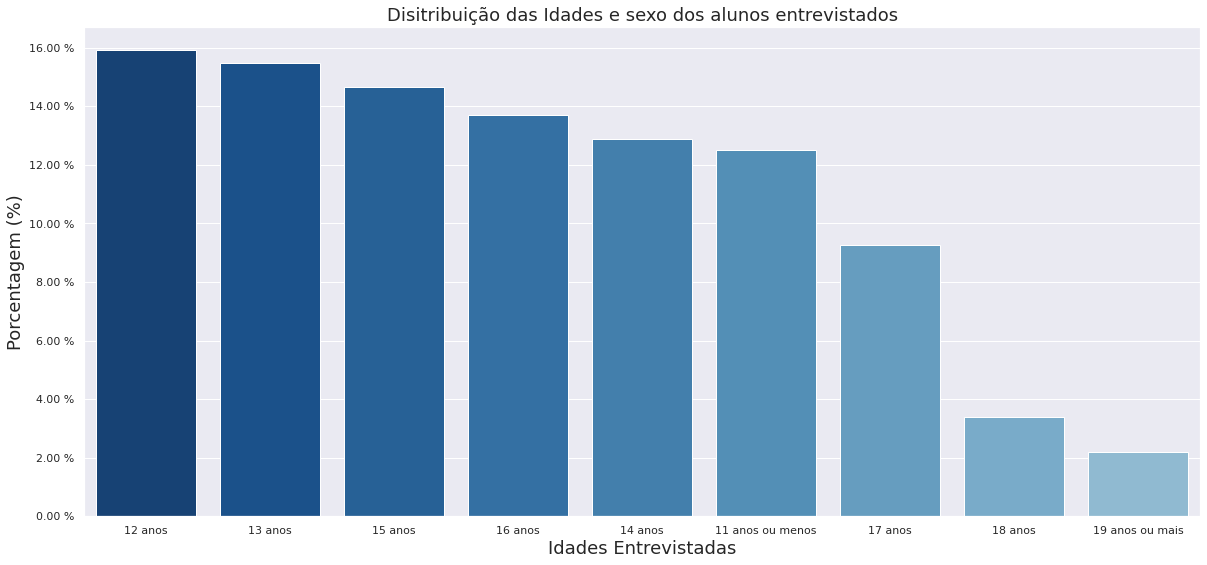

In [9]:
plt.figure(figsize=(20,9))
fig = sns.barplot(data=DF_idade_alunos,
                  x=DF_idade_alunos.index, 
                  y= 'Porcentagem',
                  palette= sns.color_palette("Blues_r",15))
fig.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f} %"))
plt.title("Disitribuição das Idades e sexo dos alunos entrevistados",size=18)
fig.set_ylabel("Porcentagem (%)",size=18)
fig.set_xlabel("Idades Entrevistadas",size=18)

fig;

Temos então acima uma boa forma de entender como estão distribuídos a idade dos alunos de toda a nossa amostra. A maioria são alunos na idade de 12 e 13 anos. Podemos entender melhor essa distribuição de idade também com relação ao sexo e idade, conforme vemos abaixo.

In [10]:
DF_idade_pelo_sexo = (pd.crosstab(dados['VB01003'],dados['VB01001'],normalize='index') *100).round(2)
DF_idade_pelo_sexo.rename(index=dicio_vb01003,inplace=True)
DF_idade_pelo_sexo = DF_idade_pelo_sexo.rename(columns=dicio_vb01001)

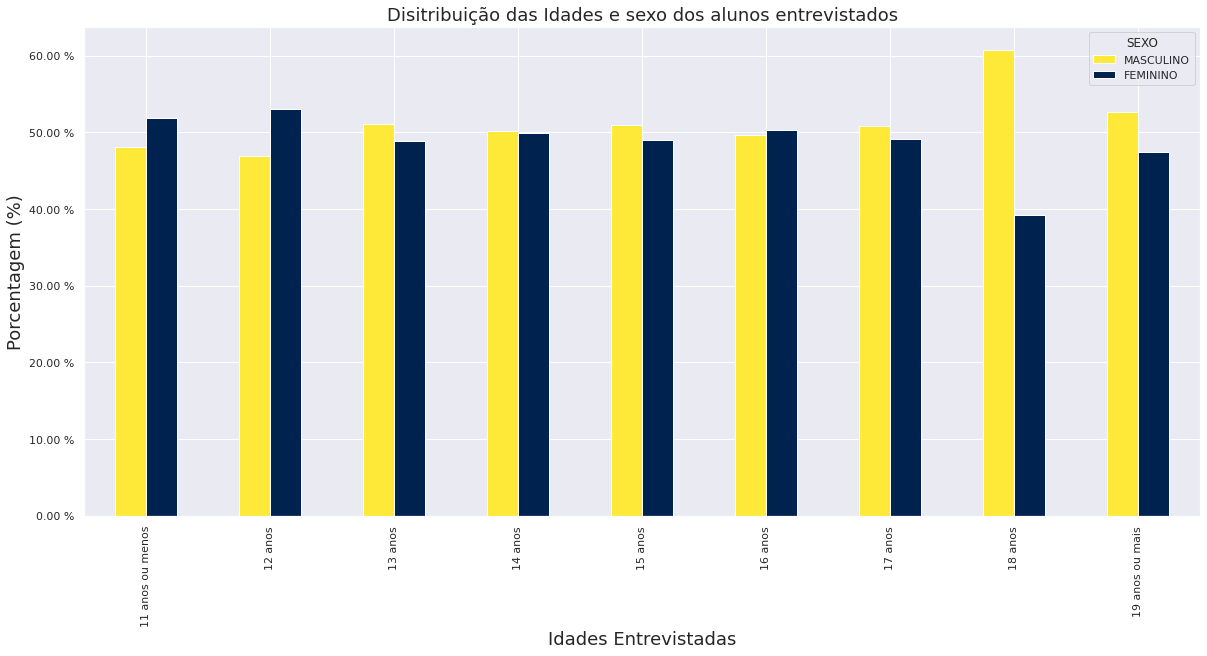

In [11]:
fig = DF_idade_pelo_sexo.plot(kind='bar',figsize=(20,9),colormap='cividis_r')
fig.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f} %"))
plt.title("Disitribuição das Idades e sexo dos alunos entrevistados",size=18)
fig.set_ylabel("Porcentagem (%)",size=18)
fig.set_xlabel("Idades Entrevistadas",size=18)

plt.legend(title='SEXO')

fig;

#RASCUNHO 2 

In [29]:
arquivos = "/content/drive/MyDrive/bootcamp-modulo3/PeNSE_2015_AMOSTRA2.zip"
zip = ZipFile(arquivos)
amostra_alunoescola = zip.namelist()[3]

In [30]:
dados = pd.read_csv(zip.open(amostra_alunoescola),sep=';',thousands='.',decimal=',')
dados

,ANOPESQ,PAIS,REGEOGR,V0006,V0007,V0008,VE01P3001,VE01P3002,VE01P3003,VE01P3004,VE01P31,VE01P32,VE01P03A01,VE01P03A02,VE01P03A03,VE01P03A04,VE01P02A,VE01P04A,VE01P01,VE01P05A,VE01P06A,VE01P33,VE01P09,VE01P10A,VE01P23,VE01P24A,VE01P34,VE01P35,VE01P15A,VE01P16A,VE01P17A,VE01P18A,VE01P20,VE01P19,VE01P36,VE01P21,VE01P37,VE01P22,VE01P38,VE01P39,...,VE01P14A07,VE01P14A08,VE01P14A09,VE01P14A10,VE01P14A11,VE01P49,VE01P50,VE01P51,VE01P52,VE01P53,VE01P54,VE01P55,VE01P56,VE01P57,VE01P58,VE01P25,VE01P59,VE01P60,VE01P61,VE01P62,VE01P63,VE01P64,VE01P65,VE01P66,VE01P67,VE01P26,VE01P27,VE01P28A,VE01P68,VE01P69,VE01P70,VE01P71,VE01P72,V0041,ESTRATO_EXP,ESTRATOGEOREG,PESO,aluno,escola,turma
0,2015,76,1,1,2,4,1,2,1,1,2,2,1,1,1,2,6,5,3,1,1,5,1,1,1,4,1,2,1,2,3,3,3,2,1,3,-1,2,1,1,...,2,2,2,2,2,2,1,1,1,1,1,1,1,1,5,1,1,2,2,-1,2,2,2,1,1,2,2,1,1,1,1,1,1,1,1223,1,299.735235,1,1,296
1,2015,76,1,1,2,4,1,2,1,1,2,2,1,1,1,2,6,5,3,1,1,5,1,1,1,4,1,2,1,2,3,3,3,2,1,3,-1,2,1,1,...,2,2,2,2,2,2,1,1,1,1,1,1,1,1,5,1,1,2,2,-1,2,2,2,1,1,2,2,1,1,1,1,1,1,1,1223,1,355.170081,2,1,296
2,2015,76,1,1,2,4,1,2,1,1,2,2,1,1,1,2,6,5,3,1,1,5,1,1,1,4,1,2,1,2,3,3,3,2,1,3,-1,2,1,1,...,2,2,2,2,2,2,1,1,1,1,1,1,1,1,5,1,1,2,2,-1,2,2,2,1,1,2,2,1,1,1,1,1,1,1,1223,1,299.735235,3,1,296
3,2015,76,1,1,2,4,1,2,1,1,2,2,1,1,1,2,6,5,3,1,1,5,1,1,1,4,1,2,1,2,3,3,3,2,1,3,-1,2,1,1,...,2,2,2,2,2,2,1,1,1,1,1,1,1,1,5,1,1,2,2,-1,2,2,2,1,1,2,2,1,1,1,1,1,1,1,1223,1,355.170081,4,1,296
4,2015,76,1,1,2,4,1,2,1,1,2,2,1,1,1,2,6,5,3,1,1,5,1,1,1,4,1,2,1,2,3,3,3,2,1,3,-1,2,1,1,...,2,2,2,2,2,2,1,1,1,1,1,1,1,1,5,1,1,2,2,-1,2,2,2,1,1,2,2,1,1,1,1,1,1,1,1223,1,299.735235,5,1,296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16551,2015,76,5,1,2,4,1,2,1,2,2,2,1,1,2,2,3,1,3,1,1,3,1,1,1,1,2,-1,2,-1,-1,3,1,1,1,3,-1,1,1,1,...,-1,-1,-1,-1,-1,2,1,2,1,1,1,1,1,1,5,4,1,2,2,-1,2,2,1,1,1,2,2,1,1,1,1,1,1,1,521,5,447.815539,16552,371,117
16552,2015,76,5,1,2,4,1,2,1,2,2,2,1,1,2,2,3,1,3,1,1,3,1,1,1,1,2,-1,2,-1,-1,3,1,1,1,3,-1,1,1,1,...,-1,-1,-1,-1,-1,2,1,2,1,1,1,1,1,1,5,4,1,2,2,-1,2,2,1,1,1,2,2,1,1,1,1,1,1,1,521,5,592.507440,16553,371,117
16553,2015,76,5,1,2,4,1,2,1,2,2,2,1,1,2,2,3,1,3,1,1,3,1,1,1,1,2,-1,2,-1,-1,3,1,1,1,3,-1,1,1,1,...,-1,-1,-1,-1,-1,2,1,2,1,1,1,1,1,1,5,4,1,2,2,-1,2,2,1,1,1,2,2,1,1,1,1,1,1,1,521,5,401.131512,16554,371,117
16554,2015,76,5,1,2,4,1,2,1,2,2,2,1,1,2,2,3,1,3,1,1,3,1,1,1,1,2,-1,2,-1,-1,3,1,1,1,3,-1,1,1,1,...,-1,-1,-1,-1,-1,2,1,2,1,1,1,1,1,1,5,4,1,2,2,-1,2,2,1,1,1,2,2,1,1,1,1,1,1,1,521,5,442.718091,16555,371,117


Primeiro vamos descobrir aonde se situam a maioria das escolas entrevistadas

In [31]:
dicio_REGEOGR ={
  1: 	"Norte",
  2:	"Nordeste",
  3:	"Sudeste",
  4:	"Sul",
  5:	"Centro-Oeste"
}

formated_table(dados['REGEOGR'],dicio_REGEOGR,"REGIÃO AONDE SE SITUA")

REGIÃO AONDE SE SITUA,Frequencia,Porcentagem
Nordeste,3465,20.93
Centro-Oeste,3420,20.66
Sudeste,3276,19.79
Sul,3207,19.37
Norte,3188,19.26


Temos que a maioria das escolas, por uma pequena diferença de menos 1%, situa-se na região nordeste, logo seguido da região centro-oeste. Uma pergunta que já podemos fazer é: **Quantas são urbanas e privadas?**

In [103]:
crosstab_data(dados['REGEOGR'],dados["V0006"], dicio1=dicio_REGEOGR, dicio2={1:"Urbano",2:"Rural"})

V0006,Urbano,Rural
REGEOGR,,
Norte,92.06,7.94
Nordeste,92.64,7.36
Sudeste,98.02,1.98
Sul,99.03,0.97
Centro-Oeste,92.78,7.22


Sabemos então que quase 8% das escolas das zona rural encontram-se na região norte e pouco menos de 1% na região sul. No total, **como estão distribuidos as escolas da zona urbana e rural no total?**

In [33]:
crosstab_data(dados['REGEOGR'],dados["V0006"], normal="columns" ,dicio1=dicio_REGEOGR, dicio2={1:"Urbano",2:"Rural"})

V0006,Urbano,Rural
REGEOGR,,
Norte,18.69,29.73
Nordeste,20.44,29.96
Sudeste,20.45,7.64
Sul,20.22,3.64
Centro-Oeste,20.20,29.02


De todas as escolas entrevistadas, 29.73% das escolas da zona rural se encontram situadas na região norte, seguido do centro-oeste. Em relação a zona urbana, a região norte possui a menor porcentagem.<br>
Ainda em relação as escolas: **Qual a porcentagem das escolas públicas e privadas para cada região e qual a participação geral que cada região representa para cada tipo de escola?**

In [34]:
escola_info = crosstab_data(dados['REGEOGR'],dados["V0007"], normal="index" ,
                            dicio1=dicio_REGEOGR,
                            dicio2={1:"Público_regiao",2:"Privada_regiao"})

escola_info[["PUBLICO_GERAL","PRIVADO_GERAL"]] = crosstab_data(dados['REGEOGR'],
                                                               dados["V0007"], 
                                                               normal="columns" ,
                                                               dicio1=dicio_REGEOGR,
                                                               dicio2={1:"Público",2:"Privada"})


escola_info

V0007,Público_regiao,Privada_regiao,PUBLICO_GERAL,PRIVADO_GERAL
REGEOGR,,,,
Norte,78.54,21.46,20.22,16.38
Nordeste,72.87,27.13,20.39,22.51
Sudeste,70.12,29.88,18.55,23.45
Sul,78.61,21.39,20.36,16.43
Centro-Oeste,74.09,25.91,20.47,21.22


Temos muitas informações interessantes para analisar. Primeiramente, mais de 70% das escolas para todas as regiões, que foram entrevistadas, são da rede pública. No que tange a valores gerais, as escolas da rede pública da região sudeste, representam pouco mais de 18,50% do total de escolas públicas em todo território nacional que foram entrevistadas. Quantos as privadas, a região sudeste é a que teve mais escolas entrevistadas e é também a com maior participação no que tange ao número de escolas privadas geral (ou seja, somando todas as escolas privadas entrevistadas no Brasil), totalizando 23.45%. Abaixo, temos duas representaçõe que nos ajudam a entender melhor essa participação geral de cada região para cada rede de ensino.

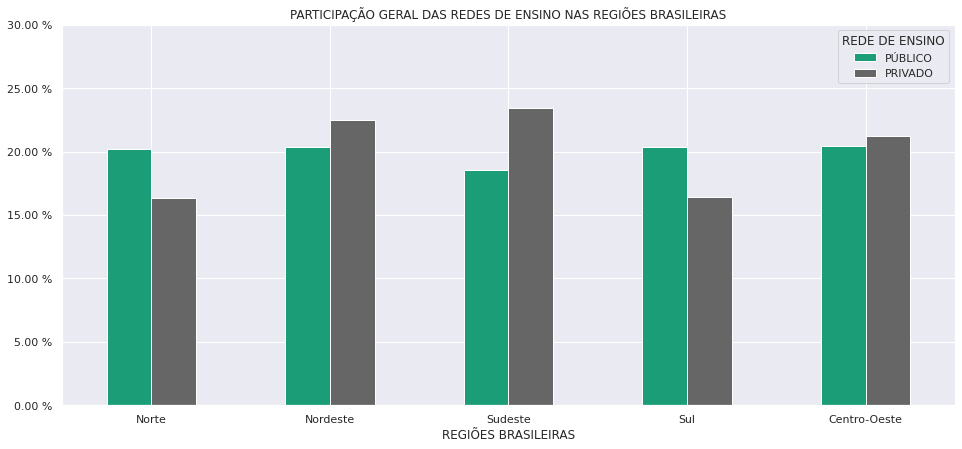

In [38]:
ax = escola_info[["PUBLICO_GERAL","PRIVADO_GERAL"]].plot(kind="bar",figsize=(16,7),colormap="Dark2")
plt.legend(title="REDE DE ENSINO",labels=["PÚBLICO","PRIVADO"])

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f} %"))

plt.xticks(rotation=0)
plt.xlabel("REGIÕES BRASILEIRAS")
plt.ylim(0,30)
plt.title("PARTICIPAÇÃO GERAL DAS REDES DE ENSINO NAS REGIÕES BRASILEIRAS")
plt.show()

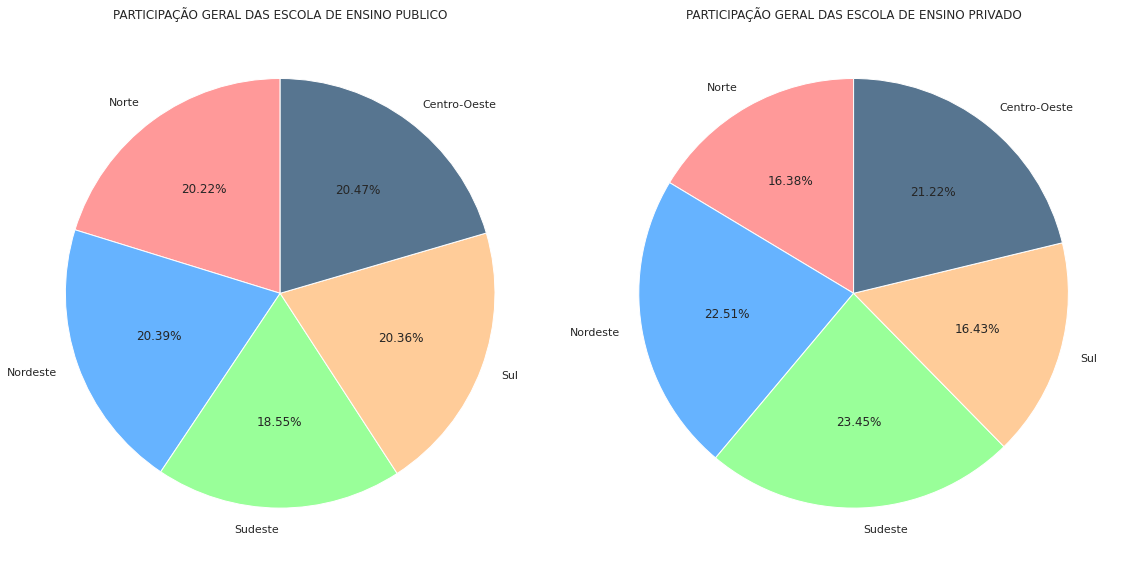

In [36]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#577590']

fig,(ax1,ax2) = plt.subplots(1,2)
fig = plt.gcf()
fig.set_size_inches(16,9)

ax1.pie(escola_info["PUBLICO_GERAL"],colors=colors,labels=escola_info.index, autopct='%1.2f%%',startangle=90)
ax1.set_title("PARTICIPAÇÃO GERAL DAS ESCOLA DE ENSINO PUBLICO")

ax2.pie(escola_info["PRIVADO_GERAL"],colors=colors,labels=escola_info.index, autopct='%1.2f%%',startangle=90)
ax2.set_title("PARTICIPAÇÃO GERAL DAS ESCOLA DE ENSINO PRIVADO")

plt.tight_layout()
plt.show()

Vejamos então algumas outras informações básicas sobre as escolas que fizeram parte da nossa entrevista. Por exemplo, **O total de alunos matriculados nas escolas**.

In [48]:
dicio_VE01P02A = {
  -2: "Dados não disponíveis",
  1	: "Até 50 alunos",
  2 :	"De 51 a 100 alunos",
  3	: "De 101 a 200 alunos",
  4 : "De 201 a 500 alunos",
  5 :	"De 501 a 1.000 alunos",
  6 :	"Mais de 1.000 alunos",
  9 :	"Não informado"
}

escola_quantindade_alunos = formated_table(dados["VE01P02A"],dicio_VE01P02A)
escola_quantindade_alunos

,Frequencia,Porcentagem
Mais de 1.000 alunos,7072,42.72
De 501 a 1.000 alunos,5927,35.80
De 201 a 500 alunos,3031,18.31
De 101 a 200 alunos,395,2.39
De 51 a 100 alunos,103,0.62
Até 50 alunos,28,0.17


- Mais de 42% das escolas entrevistadas possuem mais de 1000 alunos
- Mais de 54% das escolas possuem entre 201 até 1000 alunos.
- Cerca de 3.18% das escolas tem até 200 alunos.

Vamos investigar um dados curioso relacionado as mensalidades escolares de algumas escolas. A pergunta da enquente é: **Qual a faixa de valor da mensalidade do 9º ano na escola? (se não houver 9º ano, considerar 1º ano do Ensino Médio)**

In [78]:
dicio_VE01P01 ={
  -2:"	Dados não disponíveis",
  -1:	"Não tem mensalidade",
  2:	"Até R$ 394,00",
  3:	"Mais de R$ 394,00 até R$ 788,00",
  4:	"Mais de R$ 788,00 até R$ 1.576,00",
  5:  "Mais de R$ 1.576,00 até R$ 3.152,00",
  6:	"Mais de R$ 3.152,00 até R$ 6.304,00",
  7:	"Mais de R$ 6.304,00",
  9:	"Não informado"
}
crosstab_data(dados["VE01P01"],dados["V0007"],normal="columns",dicio1=dicio_VE01P01,dicio2={1:"PÚBLICO",2:"PRIVADO"})

V0007,PÚBLICO,PRIVADO
VE01P01,,
Não tem mensalidade,100.0,0.00
"Até R$ 394,00",0.0,17.44
"Mais de R$ 394,00 até R$ 788,00",0.0,53.94
"Mais de R$ 788,00 até R$ 1.576,00",0.0,16.43
"Mais de R$ 1.576,00 até R$ 3.152,00",0.0,4.19
Não informado,0.0,8.00


Obviamente que escolas da rede pública não teriam cobrança de mensalidade e que escolas da rede privada teriam. Observando a tabela notamos que quase 54% escola de rede privada possuem mensalidades na faixa de 394,00 até R$788,00. 

In [112]:
mensalidade_quantidade_alunos = crosstab_data(dados["VE01P01"],dados["VE01P02A"],dicio1= dicio_VE01P01,dicio2= dicio_VE01P02A)
mensalidade_quantidade_alunos

VE01P02A,Até 50 alunos,De 51 a 100 alunos,De 101 a 200 alunos,De 201 a 500 alunos,De 501 a 1.000 alunos,Mais de 1.000 alunos
VE01P01,,,,,,
Não tem mensalidade,0.12,0.83,2.20,16.57,37.36,42.91
"Até R$ 394,00",0.00,0.00,13.74,37.36,19.64,29.26
"Mais de R$ 394,00 até R$ 788,00",0.58,0.00,1.02,23.13,32.10,43.16
"Mais de R$ 788,00 até R$ 1.576,00",0.00,0.00,0.00,8.89,23.32,67.78
"Mais de R$ 1.576,00 até R$ 3.152,00",0.00,0.00,0.00,37.71,0.00,62.29
Não informado,0.00,0.00,0.00,17.66,82.34,0.00


Temos um dataframe que nos indica a porcentagem de escolas com um número x de alunos e que pagam um intervalo y de mensalidades. Na primeira linha ("NÃO TEM MENSALIDADE") somos apresentados a dados de escolas públicas. Escols públicas de até 50 alunos ou de mais de mil alunos. Todas elas não possuem um valor mensal a ser compensado pelo frenquentamento. Diferentemente das outras linhas e com exceção da última, temos algumas porcentagens que nos revelam quantos porcento as escolas da rede privada de até 500 alunos, por exemplo, paga em média de mensalidade.
Logo, Pagam em média os valores:
* Na faixa Mensalidade de até 394,00 reais para escolas de 201 até 500 alunos: **37.36 %**
* Na faixa de Mensalidade de Mais de R\$ 788,00 até R\$ 1.576,00 para escolas de Mais de 1000 alunos: **67.78 %**
* Na faixa de Mensalidade de Mais de R\$ 1.576,00 até R\$ 3.152,00	 para escolas de Mais de 1000 alunos: **62.29 %**

Continuando nossa análise, vamos ver uma pergunta que aborda a existência ou não de uma biblioteca nas escolas (EM CONDIÇÕES DE USO), seja pública ou particular.

In [138]:
dicio_VE01P05A = {
    1: "sim",
    2: "Não está em condição de uso",
    3: "Não tem Biblioteca"
}
escolas_bibliotecas = formated_table(dados['VE01P05A'],dicio_VE01P05A)
escolas_bibliotecas

,Frequencia,Porcentagem
sim,13581,82.03
Não está em condição de uso,1691,10.21
Não tem Biblioteca,1284,7.76


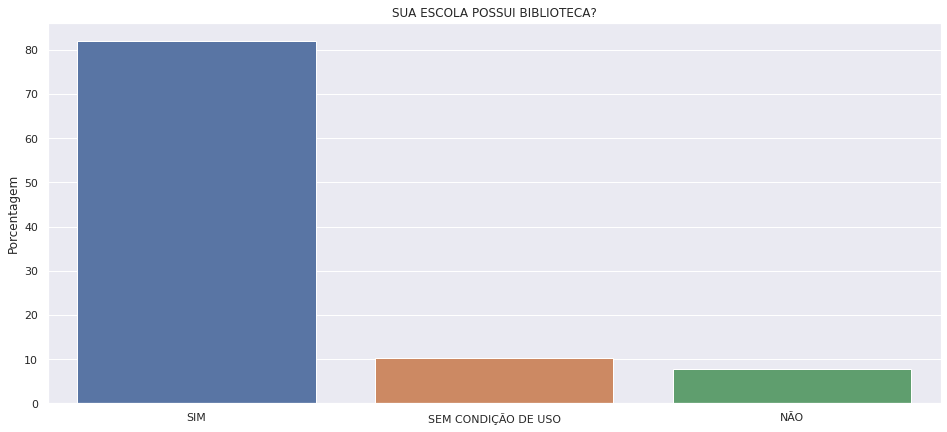

In [159]:
plt.figure(figsize=(16,7))
fig = sns.barplot(data=escolas_bibliotecas,x = escolas_bibliotecas.index,y='Porcentagem')
fig.set_xticklabels(labels = ["SIM","SEM CONDIÇÃO DE USO","NÃO"], rotation=0)
fig.set_title("SUA ESCOLA POSSUI BIBLIOTECA?")

fig;

Primeiramente temos que 82% das escolas (no geral) possuem bibliotecas. Entretanto, um dado preocupante e até mesmo assustador se levarmos em conta que mais de 16556 escolas foram entrevistadas, é que cerca de 17.9 % das escolas não possuem bibliotecas em condições de usou ou mesmo não possuem. Contudo, o impacto é ainda maior quando observamos as diferenças entre as escolas da rede pública e privada.

In [139]:
escolas_biblioteca_rede = crosstab_data(dados["VE01P05A"],dados["V0007"],normal="columns",dicio1=dicio_VE01P05A,dicio2={1:"PÚBLICO",2:"PRIVADO"})
escolas_biblioteca_rede

V0007,PÚBLICO,PRIVADO
VE01P05A,,
sim,80.23,87.38
Não está em condição de uso,11.50,6.40
Não tem Biblioteca,8.27,6.23


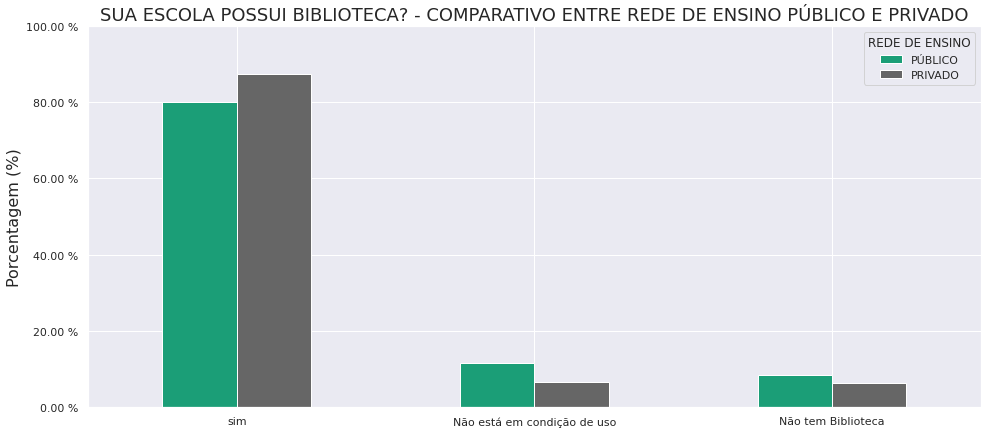

In [178]:
fig = escolas_biblioteca_rede[["PÚBLICO","PRIVADO"]].plot(kind="bar",figsize=(16,7),colormap="Dark2")
fig.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f} %"))
plt.ylim(0,100)
plt.xticks(rotation=0)
plt.xlabel("")
plt.ylabel("Porcentagem (%)",size=16)

plt.legend(title="REDE DE ENSINO")

plt.title("SUA ESCOLA POSSUI BIBLIOTECA? - COMPARATIVO ENTRE REDE DE ENSINO PÚBLICO E PRIVADO",size=18)
plt.show()

Claramente as escolas da rede privada possuem mais bibliotecas do que a da rede pública, uma vez que as verbas de escolas públicas não são bem aproveitadas do que os valores de mensalidade que são aplicados nas particulares E isso, apenas na nossa amostra.

In [211]:
aluno_por_escola = dados.groupby('escola')['aluno'].count()

In [221]:
aluno_por_escola

escola
1      77
2      36
3      34
4      37
5      61
       ..
367    26
368    66
369    66
370    42
371     7
Name: aluno, Length: 371, dtype: int64